In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

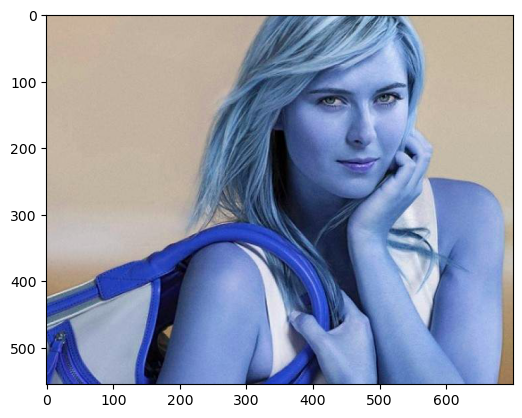

In [21]:
img = cv2.imread(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\test_images\sharapova-hits-the-practice-courts-and-met-ball-kids.jpg")
plt.imshow(img)


In [4]:
# removing the third dimension which is rgb scale (h1)

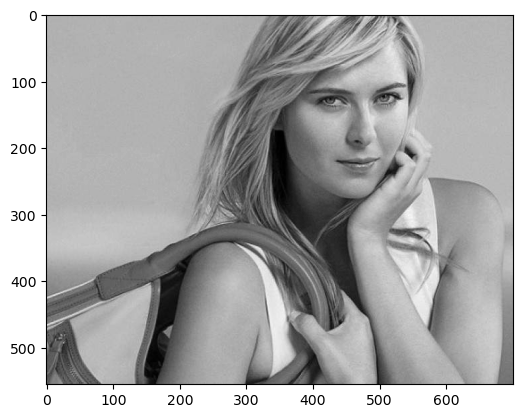

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [23]:
grayface_cascade = cv2.CascadeClassifier(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\opencv\haarcascades\haarcascade_eye.xml")

In [25]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


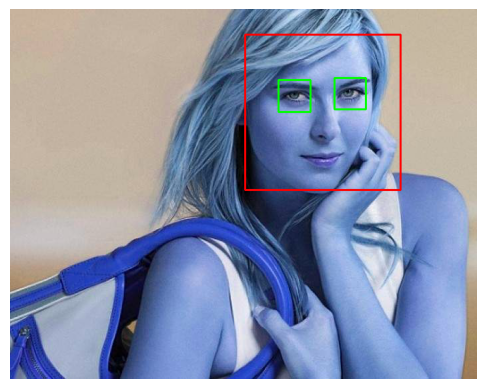

In [26]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
    
    # Detect eyes within face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

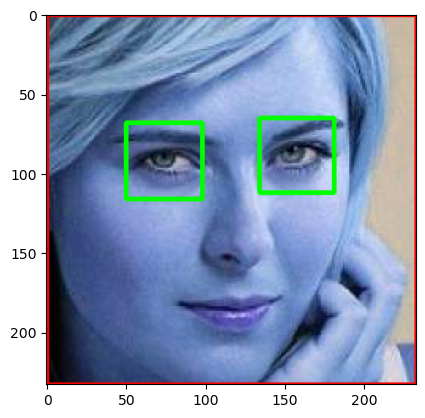

In [27]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [32]:

def cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None


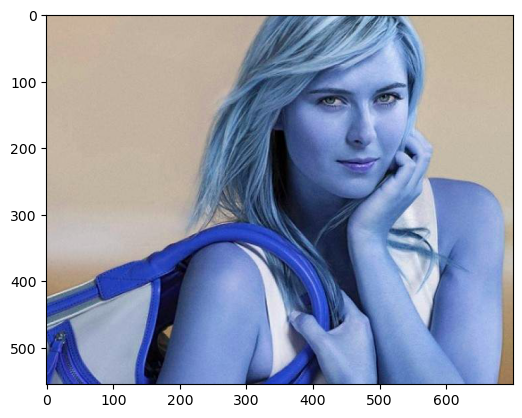

In [34]:
image1 = cv2.imread(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\test_images\sharapova-hits-the-practice-courts-and-met-ball-kids.jpg")
plt.imshow(image1)

In [35]:
original_image1 = cropped_image(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\test_images\sharapova-hits-the-practice-courts-and-met-ball-kids.jpg")

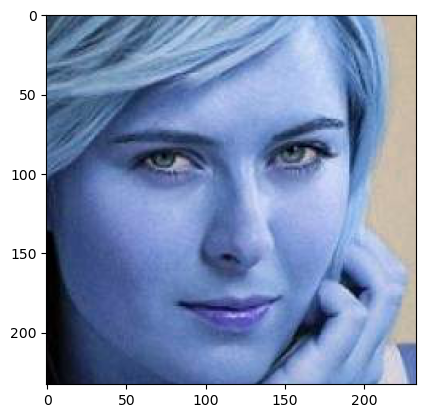

In [36]:
plt.imshow(original_image1)

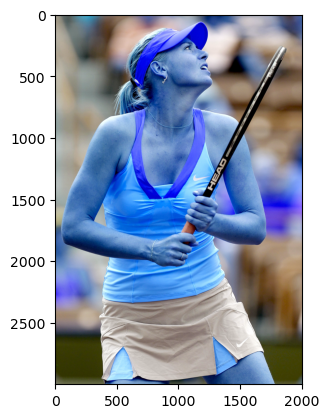

In [37]:
original_image = cv2.imread(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\test_images\3-681.jpg")
plt.imshow(original_image)

In [38]:
crop_image2 = cropped_image(r"C:\Users\Laraib\Desktop\Data Science\ml\ML-Projects\Sports Person Classifier\model\test_images\3-681.jpg")

In [39]:
if crop_image2 is not None:
    plt.imshow(crop_image2)
else:
    print("No face with two eyes detected in the image.")

No face with two eyes detected in the image.


In [40]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [42]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [43]:
img_dirs 

['./dataset/cristiano_ronaldo',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [47]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)    ##To create cropped folder
os.mkdir(path_to_cr_data)    

In [51]:
cropped_image_dirs = []
celebrity_file_names_dict ={}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    #print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder " , cropped_folder)
            cropped_file_name = celebrity_name+ str(count) + ".png"
            cropped_file_path = cropped_folder+ "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

generating cropped images in folder  ./dataset/cropped/cristiano_ronaldo
generating cropped images in folder  ./dataset/cropped/maria_sharapova
generating cropped images in folder  ./dataset/cropped/roger_federer
generating cropped images in folder  ./dataset/cropped/serena_williams
generating cropped images in folder  ./dataset/cropped/virat_kohli
